<a href="https://colab.research.google.com/github/isaacye/SS2020_ML_Day2/blob/master/Session_2/Lab2B_Linear_Reg_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
print(torch.__version__)

1.5.0+cu101


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

##**Data Preparation**

In [0]:
num_data = 2400
x1 = np.random.rand(num_data) *10
x2 = np.random.rand(num_data) *10
e = np.random.normal(0, 0.5, num_data)
X= np.array([x1,x2]).T  # T for transpose from (2, 2400) to (2400, 2)
y=2*np.sin(x1) + np.log(0.5*x2**2)+e

Data split

In [0]:
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

##**Visualizating input data**

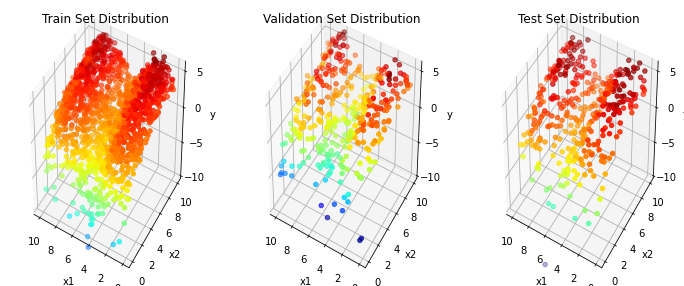

In [0]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 3, 1, projection='3d') # size 1 row, 3 col, location 1
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)  # z axis limit
ax1.view_init(40, -60) #view angle
ax1.invert_xaxis() #direction of number line

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

##**Model(Hypothesis) Define**

In [0]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = nn.Linear(in_features=2, out_features=1, bias=True) 

  def forward(self, x):      
    return self.linear(x)


##**Cost(Loss) Function**

In [0]:
reg_loss = nn.MSELoss()

##**Training & Evaluation**

3 parameters


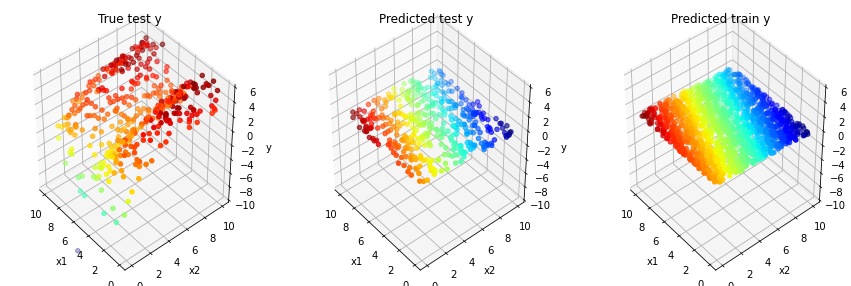

0 tensor(10.4492, grad_fn=<MseLossBackward>)


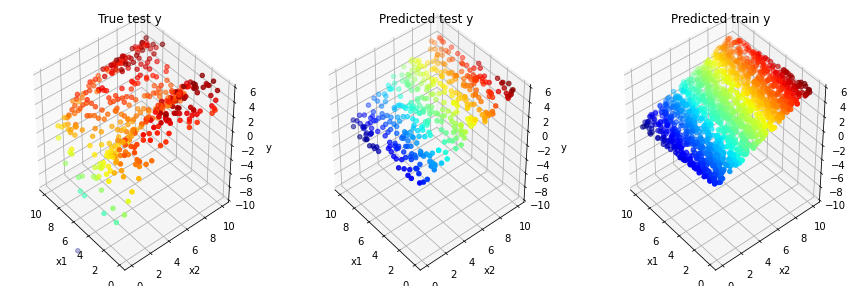

200 tensor(3.1043, grad_fn=<MseLossBackward>)


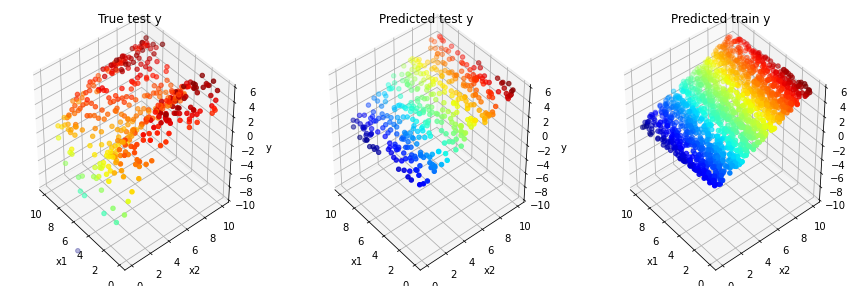

400 tensor(3.0494, grad_fn=<MseLossBackward>)


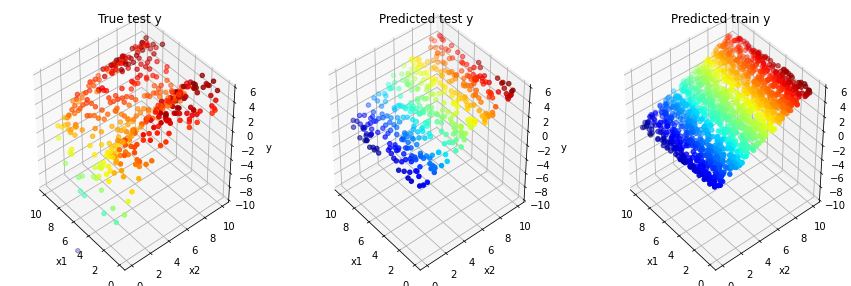

600 tensor(3.0201, grad_fn=<MseLossBackward>)


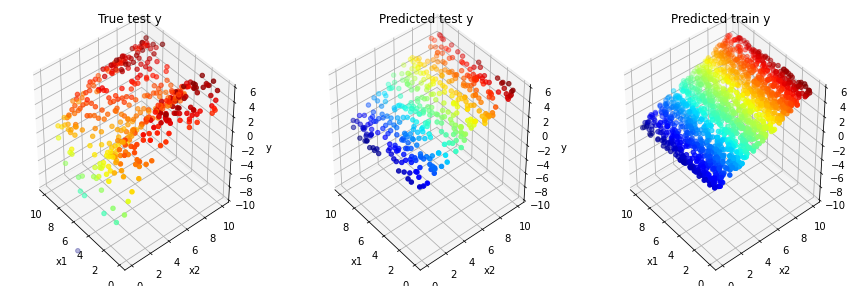

800 tensor(3.0047, grad_fn=<MseLossBackward>)


In [0]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

model = LinearModel()

print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr =lr)  # model.parameters : W, b of linear model

list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000

for i in range(epoch):

  # ===== Training ===== #
  model.train() #setting mode for model train
  optimizer.zero_grad() # initialize gradient

  input_x = torch.Tensor(train_X)
  true_y = torch.Tensor(train_y)
  pred_y = model(input_x)

 # print(input_x.shape, true_y.shape, pred_y.shape)

  loss = reg_loss(pred_y.squeeze(), true_y) # dropping column of pred_y dimession
  loss.backward() # backward() calculate gradients
  optimizer.step() # update gradients using step()
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy()) #taking only loss value using detach


  # ===== Validation =====#
  model.eval() #setting mode for model validation
  optimizer.zero_grad()

  input_x = torch.Tensor(val_X)
  true_y = torch.Tensor(val_y)
  pred_y = model(input_x)   

  loss = reg_loss(pred_y.squeeze(), true_y)
  list_val_loss.append(loss.detach().numpy())

  # ====== Evaluation ======= #
  
  if i % 200 == 0: 
        
        # ====== Calculate Error ====== #
        model.eval()
        optimizer.zero_grad()
        
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

##**Presenting loss and error**

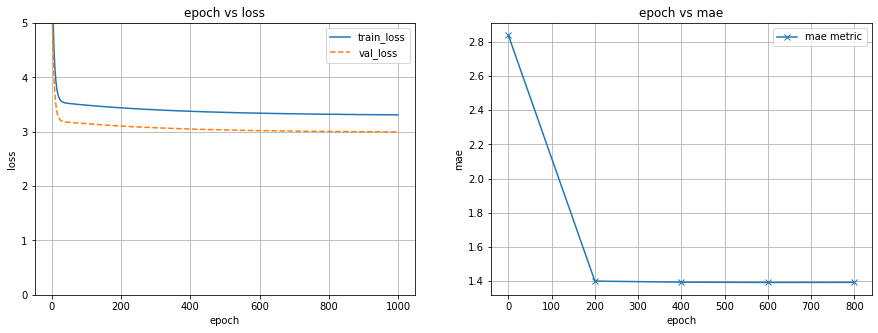

In [0]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()